In [28]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from torchvision import datasets
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch
from tqdm import tqdm
from matplotlib import pyplot as plt

In [29]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_set=datasets.MNIST('data', train=True, download=True, transform=transform)
test_set=datasets.MNIST('data', train=False, download=True, transform=transform)

train_loader=torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader=torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)
DEVICE = torch.device("cpu") 
print("Train set size: ", len(train_set))
print("Test set size: ", len(test_set))
print(train_loader.dataset.data.shape)
print(train_loader.dataset.targets.shape)

Train set size:  60000
Test set size:  10000
torch.Size([60000, 28, 28])
torch.Size([60000])


In [30]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28 * 1, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 10),
            nn.LogSoftmax(dim = 1)
        )

    def forward(self, x):
        return self.layers(x)


In [31]:
lossArray=[]
accuracyArray=[]
def train(model, device, train_loader, optimizer, epoch, loss_function):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        try:
            loss = loss_function(output, target)
        except:
            ones = torch.sparse.torch.eye(10).to(DEVICE)  # number of class class
            target = ones.index_select(0, target)
            loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        if(batch_idx)%(200) == 0: 
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def test(model, device, test_loader, loss_function):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            # test_loss += loss_function(output, target, reduction='sum').item() # sum up batch loss
            try:
                loss = loss_function(output, target)
            except:
                ones = torch.sparse.torch.eye(10).to(DEVICE)  # number of class class
                label = ones.index_select(0, target)
                loss = loss_function(output, label)
            test_loss += loss.item()
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item() # sum up the correct number

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    lossArray.append(test_loss)
    accuracyArray.append(100. * correct / len(test_loader.dataset))

Train Epoch: 0 [0/60000 (0%)]	Loss: 3793.352783


/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Train Epoch: 0 [12800/60000 (21%)]	Loss: 3742.368896
Train Epoch: 0 [25600/60000 (43%)]	Loss: 3740.630127
Train Epoch: 0 [38400/60000 (64%)]	Loss: 3740.698486
Train Epoch: 0 [51200/60000 (85%)]	Loss: 3740.592529


/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Test set: Average loss: 58.4343, Accuracy: 8780/10000 (87.80%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 3740.241211
Train Epoch: 1 [12800/60000 (21%)]	Loss: 3739.054199
Train Epoch: 1 [25600/60000 (43%)]	Loss: 3740.552490
Train Epoch: 1 [38400/60000 (64%)]	Loss: 3738.519531
Train Epoch: 1 [51200/60000 (85%)]	Loss: 3740.947266

Test set: Average loss: 58.4260, Accuracy: 9013/10000 (90.13%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 3740.264160
Train Epoch: 2 [12800/60000 (21%)]	Loss: 3740.315918
Train Epoch: 2 [25600/60000 (43%)]	Loss: 3738.650635
Train Epoch: 2 [38400/60000 (64%)]	Loss: 3738.930664
Train Epoch: 2 [51200/60000 (85%)]	Loss: 3739.790527

Test set: Average loss: 58.4230, Accuracy: 8980/10000 (89.80%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 3739.103271
Train Epoch: 3 [12800/60000 (21%)]	Loss: 3740.816162
Train Epoch: 3 [25600/60000 (43%)]	Loss: 3739.303711
Train Epoch: 3 [38400/60000 (64%)]	Loss: 3738.012451
Train Epoch: 3 [51200/60000 (85%)]	Loss: 3741.048340

Test set: Average loss: 

([<matplotlib.axis.XTick at 0x7f8cc0c085d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

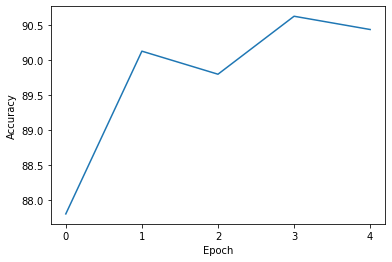

In [32]:
model=MLP().to(DEVICE)
optimizer=torch.optim.Adam(model.parameters(), lr=0.01)
loss=nn.MSELoss(reduction='sum')
for epoch in range(5):
    train(model, DEVICE, train_loader, optimizer, epoch, loss)
    test(model, DEVICE, test_loader, loss)
plt.plot(accuracyArray, label="MSELoss Accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, 5, 1))


model=MLP().to(DEVICE)
optimizer=torch.optim.Adam(model.parameters(), lr=0.01)
loss=nn.NLLLoss(reduction='sum')
accuracyArray=[]
for epoch in range(5):
    train(model, DEVICE, train_loader, optimizer, epoch, loss)
    test(model, DEVICE, test_loader, loss)
plt.plot(accuracyArray, label="NLLLoss Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, 5, 1))
plt.legend()
plt.show()

Train Epoch: 0 [0/60000 (0%)]	Loss: 147.671555
Train Epoch: 0 [12800/60000 (21%)]	Loss: 22.394711
Train Epoch: 0 [25600/60000 (43%)]	Loss: 4.895274
Train Epoch: 0 [38400/60000 (64%)]	Loss: 4.320593
Train Epoch: 0 [51200/60000 (85%)]	Loss: 12.071854

Test set: Average loss: 0.2032, Accuracy: 9413/10000 (94.13%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 4.986445
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.798363
Train Epoch: 1 [25600/60000 (43%)]	Loss: 9.627895
Train Epoch: 1 [38400/60000 (64%)]	Loss: 18.603691
Train Epoch: 1 [51200/60000 (85%)]	Loss: 6.527767

Test set: Average loss: 0.1898, Accuracy: 9473/10000 (94.73%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 3.897738
Train Epoch: 2 [12800/60000 (21%)]	Loss: 4.852042
Train Epoch: 2 [25600/60000 (43%)]	Loss: 6.241174
Train Epoch: 2 [38400/60000 (64%)]	Loss: 9.049638
Train Epoch: 2 [51200/60000 (85%)]	Loss: 13.730740

Test set: Average loss: 0.1956, Accuracy: 9457/10000 (94.57%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 17.686926
Train Epoch: 3 [12800

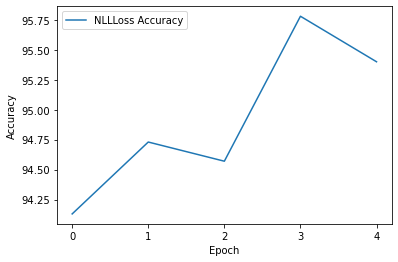